In [1]:
import requests 
import pandas as pd
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from time import sleep
import helium
import numpy as np
from selenium import webdriver

In [2]:
# OBTENCION DE DATOS
#==================================================================================================

In [3]:
#Abrir navegador

from webdriver_manager.chrome import ChromeDriverManager
driver = webdriver.Chrome(ChromeDriverManager().install())

In [4]:
#Abrir paginaweb de autocasion para coches eléctricos de segunda mano 

driver.get("https://www.autocasion.com/coches-segunda-mano/electrico")
driver.maximize_window()

In [6]:
#Aceptar cookies

driver.find_element_by_css_selector("#didomi-notice-agree-button").click()
sleep(3)

In [5]:
#Obtenre el html de la pagina

driver.page_source

'<html lang="es"><head><style type="text/css">@charset "UTF-8";[ng\\:cloak],[ng-cloak],[data-ng-cloak],[x-ng-cloak],.ng-cloak,.x-ng-cloak,.ng-hide:not(.ng-hide-animate){display:none !important;}ng\\:form{display:block;}.ng-animate-shim{visibility:hidden;}.ng-anchor{position:absolute;}</style>\n        <meta charset="utf-8">\n        <meta http-equiv="X-UA-Compatible" content="IE=edge">\n        <meta name="viewport" content="width=device-width, initial-scale=1">\n        <meta name="theme-color" content="#f44336">\n        <meta property="og:title" content="Coches de segunda mano  Eléctricos al mejor precio">\n        <meta property="og:description" content="Coches de segunda mano  Eléctricos al precio que necesitas en Autocasion">\n        <meta property="og:url" content="https://www.autocasion.com/coches-segunda-mano/electrico">\n        <meta property="og:type" content="website">\n        <meta name="description" content="3729 coches Eléctrico de segunda mano. Entra y encuentra los 

In [6]:
#BeatifulSoup para la información

soup = BeautifulSoup(driver.page_source, "html.parser")

In [7]:
soup

<html lang="es"><head><style type="text/css">@charset "UTF-8";[ng\:cloak],[ng-cloak],[data-ng-cloak],[x-ng-cloak],.ng-cloak,.x-ng-cloak,.ng-hide:not(.ng-hide-animate){display:none !important;}ng\:form{display:block;}.ng-animate-shim{visibility:hidden;}.ng-anchor{position:absolute;}</style>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="#f44336" name="theme-color"/>
<meta content="Coches de segunda mano  Eléctricos al mejor precio" property="og:title"/>
<meta content="Coches de segunda mano  Eléctricos al precio que necesitas en Autocasion" property="og:description"/>
<meta content="https://www.autocasion.com/coches-segunda-mano/electrico" property="og:url"/>
<meta content="website" property="og:type"/>
<meta content="3729 coches Eléctrico de segunda mano. Entra y encuentra los vehículos Eléctrico de ocasión  al mejor precio en Autocasion." name="description"/>
<meta co

In [8]:
#Este elemento contiene todos los datos con los trabajaremos

soup.find("div", class_="contenido-anuncio")

<div class="contenido-anuncio">
<h2 itemprop="name">  VOLKSWAGEN Golf e-Golf ePower  </h2>
<p class="precio">
<span>24.590 € </span>
<span>Precio al contado</span>
</p>
<p class="precio financiado">
<span>22.290 € </span>
<span>Precio financiado</span>
</p>
<ul>
<li>Eléctrico</li>
<li>2018</li>
<li>47.403 km</li>
<li>136 cv</li>
<li class="provincia"><span class="icon icon-ubicacion"></span>Sevilla</li>
</ul>
</div>

In [9]:
#Para obtener la marca

marca = soup.find("div", class_="contenido-anuncio")("h2")[0].text.split(" ")[2]
marca

'VOLKSWAGEN'

In [10]:
#Para obtener precio al contado

precio_contado = soup.find("div", class_="contenido-anuncio")("span")[0].text
precio_contado

'24.590 € '

In [11]:
#Para obtener precio financiado

precio_financiado = soup.find("div", class_="contenido-anuncio")("span")[2].text
precio_financiado

'22.290 € '

In [12]:
#Para obtener el resto de datos, que se encuentran en un set

datos = soup.find("div", class_="contenido-anuncio")("ul")

a = datos[0].get_text().split("\n")
a

['', 'Eléctrico', '2018', '47.403 km', '136 cv', 'Sevilla', '']

In [13]:
#Para obtener el combustible

combustible = a[1]
combustible

'Eléctrico'

In [14]:
#Para obtener el año

anno = a[2]
anno

'2018'

In [15]:
#Para obtener los kilometros

km = a[3]
km

'47.403 km'

In [16]:
#Para obtener la potencia

cv = a[4]
cv

'136 cv'

In [17]:
#Para obtener la provincia

provincia = a[5]
provincia

'Sevilla'

In [18]:
#Esta función sirve para obtener el número máximo de paginas de las que vamos a extraer los datos. 
#El dato html que contiene los datos de paginación es <div class="paginacion">

def obtener_paginacion ():
    
    datos_paginacion = soup.find("div", class_="paginacion")("ul")
    maximo_paginado = datos_paginacion[0].get_text().split("\n")
    maximo_paginado = maximo_paginado[4].split(" ")
    
    return int(maximo_paginado[3])

In [19]:
#Para obtener las url de cada una de las paginas 

urls=list()
for j in range(1, obtener_paginacion()+1):
    url = "https://www.autocasion.com/coches-segunda-mano/electrico?page="+str(j)
    urls.append(url)  
    
urls[0]


'https://www.autocasion.com/coches-segunda-mano/electrico?page=1'

In [20]:
#Para obtener los datos de todos los coches, una vez corregido la presencia de NaNs

marcas = list()
precios_contado = list()
precios_financiado = list()
combustibles = list()
annos = list()
kms = list()
cvs = list()
provincias = list()

for url in urls:
    print("[INFO] Intentando parsear url: " + url)
    try:
        browser = helium.start_chrome(url, headless = True)
        sleep(3)
        soup = BeautifulSoup(browser.page_source, "html.parser")
    except:
        try:
            print("[ERROR] Error obteniendo datos de la url: " + url)
            browser.close()
            browser.quit()
            continue
        except:
            print("[ERROR] Error intentando cerrar browser, tras fallo de la url")
            continue
    for coche in soup.find_all("div", class_="contenido-anuncio"):
        try:
            marca = coche("h2")[0].text.split(" ")[2]
        except:
            marca = np.nan
        
        try:
            precio_contado = coche("span")[0].text
        except:
            precio_contado = np.nan
        
        try:
            precio_financiado = coche("span")[2].text
        except:
            precio_financiado = np.nan

        datos = coche("ul")
        a = datos[0].get_text().split("\n")
                
        try:
            combustible = a[1]
        except:
            combustible = np.nan
        
        try:
            anno = a[2]
        except:
            anno = np.nan
            
        try:
            km = a[3]
        except:
            km = np.nan
        
        try:
            cv = a[4]
        except:
            cv = np.nan
        
        try:
            provincia = a[5]
        except:
            provincia = np.nan

        #Appends
        marcas.append(marca)
        precios_contado.append(precio_contado)
        precios_financiado.append(precio_financiado)
        combustibles.append(combustible)
        annos.append(anno)
        kms.append(km)
        cvs.append(cv)
        provincias.append(provincia)
    browser.close()
    browser.quit()
    print(url)
    print("[SUCCESS] Parseado exitoso!")   
  

[INFO] Intentando parsear url: https://www.autocasion.com/coches-segunda-mano/electrico?page=1
https://www.autocasion.com/coches-segunda-mano/electrico?page=1
[SUCCESS] Parseado exitoso!
[INFO] Intentando parsear url: https://www.autocasion.com/coches-segunda-mano/electrico?page=2
https://www.autocasion.com/coches-segunda-mano/electrico?page=2
[SUCCESS] Parseado exitoso!
[INFO] Intentando parsear url: https://www.autocasion.com/coches-segunda-mano/electrico?page=3
https://www.autocasion.com/coches-segunda-mano/electrico?page=3
[SUCCESS] Parseado exitoso!
[INFO] Intentando parsear url: https://www.autocasion.com/coches-segunda-mano/electrico?page=4
https://www.autocasion.com/coches-segunda-mano/electrico?page=4
[SUCCESS] Parseado exitoso!
[INFO] Intentando parsear url: https://www.autocasion.com/coches-segunda-mano/electrico?page=5
https://www.autocasion.com/coches-segunda-mano/electrico?page=5
[SUCCESS] Parseado exitoso!
[INFO] Intentando parsear url: https://www.autocasion.com/coches-

https://www.autocasion.com/coches-segunda-mano/electrico?page=44
[SUCCESS] Parseado exitoso!
[INFO] Intentando parsear url: https://www.autocasion.com/coches-segunda-mano/electrico?page=45
https://www.autocasion.com/coches-segunda-mano/electrico?page=45
[SUCCESS] Parseado exitoso!
[INFO] Intentando parsear url: https://www.autocasion.com/coches-segunda-mano/electrico?page=46
https://www.autocasion.com/coches-segunda-mano/electrico?page=46
[SUCCESS] Parseado exitoso!
[INFO] Intentando parsear url: https://www.autocasion.com/coches-segunda-mano/electrico?page=47
https://www.autocasion.com/coches-segunda-mano/electrico?page=47
[SUCCESS] Parseado exitoso!
[INFO] Intentando parsear url: https://www.autocasion.com/coches-segunda-mano/electrico?page=48
https://www.autocasion.com/coches-segunda-mano/electrico?page=48
[SUCCESS] Parseado exitoso!
[INFO] Intentando parsear url: https://www.autocasion.com/coches-segunda-mano/electrico?page=49
https://www.autocasion.com/coches-segunda-mano/electric

https://www.autocasion.com/coches-segunda-mano/electrico?page=88
[SUCCESS] Parseado exitoso!
[INFO] Intentando parsear url: https://www.autocasion.com/coches-segunda-mano/electrico?page=89
https://www.autocasion.com/coches-segunda-mano/electrico?page=89
[SUCCESS] Parseado exitoso!
[INFO] Intentando parsear url: https://www.autocasion.com/coches-segunda-mano/electrico?page=90
https://www.autocasion.com/coches-segunda-mano/electrico?page=90
[SUCCESS] Parseado exitoso!
[INFO] Intentando parsear url: https://www.autocasion.com/coches-segunda-mano/electrico?page=91
https://www.autocasion.com/coches-segunda-mano/electrico?page=91
[SUCCESS] Parseado exitoso!
[INFO] Intentando parsear url: https://www.autocasion.com/coches-segunda-mano/electrico?page=92
https://www.autocasion.com/coches-segunda-mano/electrico?page=92
[SUCCESS] Parseado exitoso!
[INFO] Intentando parsear url: https://www.autocasion.com/coches-segunda-mano/electrico?page=93
https://www.autocasion.com/coches-segunda-mano/electric

https://www.autocasion.com/coches-segunda-mano/electrico?page=132
[SUCCESS] Parseado exitoso!
[INFO] Intentando parsear url: https://www.autocasion.com/coches-segunda-mano/electrico?page=133
https://www.autocasion.com/coches-segunda-mano/electrico?page=133
[SUCCESS] Parseado exitoso!
[INFO] Intentando parsear url: https://www.autocasion.com/coches-segunda-mano/electrico?page=134
https://www.autocasion.com/coches-segunda-mano/electrico?page=134
[SUCCESS] Parseado exitoso!
[INFO] Intentando parsear url: https://www.autocasion.com/coches-segunda-mano/electrico?page=135
https://www.autocasion.com/coches-segunda-mano/electrico?page=135
[SUCCESS] Parseado exitoso!
[INFO] Intentando parsear url: https://www.autocasion.com/coches-segunda-mano/electrico?page=136
https://www.autocasion.com/coches-segunda-mano/electrico?page=136
[SUCCESS] Parseado exitoso!
[INFO] Intentando parsear url: https://www.autocasion.com/coches-segunda-mano/electrico?page=137
https://www.autocasion.com/coches-segunda-man

https://www.autocasion.com/coches-segunda-mano/electrico?page=175
[SUCCESS] Parseado exitoso!
[INFO] Intentando parsear url: https://www.autocasion.com/coches-segunda-mano/electrico?page=176
https://www.autocasion.com/coches-segunda-mano/electrico?page=176
[SUCCESS] Parseado exitoso!
[INFO] Intentando parsear url: https://www.autocasion.com/coches-segunda-mano/electrico?page=177
https://www.autocasion.com/coches-segunda-mano/electrico?page=177
[SUCCESS] Parseado exitoso!
[INFO] Intentando parsear url: https://www.autocasion.com/coches-segunda-mano/electrico?page=178
https://www.autocasion.com/coches-segunda-mano/electrico?page=178
[SUCCESS] Parseado exitoso!
[INFO] Intentando parsear url: https://www.autocasion.com/coches-segunda-mano/electrico?page=179
https://www.autocasion.com/coches-segunda-mano/electrico?page=179
[SUCCESS] Parseado exitoso!
[INFO] Intentando parsear url: https://www.autocasion.com/coches-segunda-mano/electrico?page=180
https://www.autocasion.com/coches-segunda-man

https://www.autocasion.com/coches-segunda-mano/electrico?page=218
[SUCCESS] Parseado exitoso!
[INFO] Intentando parsear url: https://www.autocasion.com/coches-segunda-mano/electrico?page=219
https://www.autocasion.com/coches-segunda-mano/electrico?page=219
[SUCCESS] Parseado exitoso!
[INFO] Intentando parsear url: https://www.autocasion.com/coches-segunda-mano/electrico?page=220
https://www.autocasion.com/coches-segunda-mano/electrico?page=220
[SUCCESS] Parseado exitoso!
[INFO] Intentando parsear url: https://www.autocasion.com/coches-segunda-mano/electrico?page=221
https://www.autocasion.com/coches-segunda-mano/electrico?page=221
[SUCCESS] Parseado exitoso!
[INFO] Intentando parsear url: https://www.autocasion.com/coches-segunda-mano/electrico?page=222
https://www.autocasion.com/coches-segunda-mano/electrico?page=222
[SUCCESS] Parseado exitoso!
[INFO] Intentando parsear url: https://www.autocasion.com/coches-segunda-mano/electrico?page=223
https://www.autocasion.com/coches-segunda-man

In [21]:
df = pd.DataFrame()
df["Marca"] = marcas
df["Año"] = annos
df["Km"] = kms
df["CV"] = cvs
df["Provincia"] = provincias
df["P_cont"] = precios_contado
df["P_finan"] = precios_financiado

df

,Marca,Año,Km,CV,Provincia,P_cont,P_finan
0,VOLKSWAGEN,2018,47.403 km,136 cv,Sevilla,24.590 €,22.290 €
1,BMW,2018,38.056 km,170 cv,Zaragoza,23.990 €,21.590 €
2,PORSCHE,2021,19.000 km,490 cv,La Coruña,116.900 €,116.900 €
3,JAGUAR,2021,19.852 km,400 cv,Badajoz,61.300 €,53.304 €
4,VOLKSWAGEN,2021,33.042 km,204 cv,Badajoz,41.800 €,36.348 €
...,...,...,...,...,...,...,...
3725,DS,2021,15.200 km,136 cv,Madrid,33.000 €,
3726,OPEL,2021,17.990 km,136 cv,Cádiz,19.580 €,
3727,MERCEDES-BENZ,2023,300 km,190 cv,Barcelona,62.500 €,58.500 €
3728,PORSCHE,2021,17.500 km,435 cv,La Coruña,119.900 €,119.900 €


In [ ]:
# COMENZAMOS LA LIMPIEZA DEL DATAFRAME
#==================================================================================================

In [23]:
# Sustituimos todos los espacios vacíos por un NaN con el objetivo de eliminarlos en el próximo punto.

df = df.replace("",np.nan)
df

,Marca,Año,Km,CV,Provincia,P_cont,P_finan
0,VOLKSWAGEN,2018,47.403 km,136 cv,Sevilla,24.590 €,22.290 €
1,BMW,2018,38.056 km,170 cv,Zaragoza,23.990 €,21.590 €
2,PORSCHE,2021,19.000 km,490 cv,La Coruña,116.900 €,116.900 €
3,JAGUAR,2021,19.852 km,400 cv,Badajoz,61.300 €,53.304 €
4,VOLKSWAGEN,2021,33.042 km,204 cv,Badajoz,41.800 €,36.348 €
...,...,...,...,...,...,...,...
3725,DS,2021,15.200 km,136 cv,Madrid,33.000 €,NaN
3726,OPEL,2021,17.990 km,136 cv,Cádiz,19.580 €,NaN
3727,MERCEDES-BENZ,2023,300 km,190 cv,Barcelona,62.500 €,58.500 €
3728,PORSCHE,2021,17.500 km,435 cv,La Coruña,119.900 €,119.900 €


In [24]:
# Eliminamos todos los NaN

df.dropna(inplace = True)
df

,Marca,Año,Km,CV,Provincia,P_cont,P_finan
0,VOLKSWAGEN,2018,47.403 km,136 cv,Sevilla,24.590 €,22.290 €
1,BMW,2018,38.056 km,170 cv,Zaragoza,23.990 €,21.590 €
2,PORSCHE,2021,19.000 km,490 cv,La Coruña,116.900 €,116.900 €
3,JAGUAR,2021,19.852 km,400 cv,Badajoz,61.300 €,53.304 €
4,VOLKSWAGEN,2021,33.042 km,204 cv,Badajoz,41.800 €,36.348 €
...,...,...,...,...,...,...,...
3716,MINI,2020,23.902 km,184 cv,Madrid,32.495 €,30.995 €
3717,MINI,2021,25.413 km,184 cv,Madrid,32.495 €,30.995 €
3724,BMW,2017,72.830 km,170 cv,Madrid,24.500 €,23.500 €
3727,MERCEDES-BENZ,2023,300 km,190 cv,Barcelona,62.500 €,58.500 €


In [25]:
# Creamos función para elminar cadenas sobrantes de los datos.
# En las siguientes lineas los iremos eliminado

def eliminar_cadena_sobrante(columna,cadena):
    df[columna] = df[columna].str.replace(cadena,"")

In [26]:
# Eliminamos la palabra "km" de la columna Km

eliminar_cadena_sobrante("Km","km")

In [27]:
# Eliminamos la palabra "cv" de la columna CV

eliminar_cadena_sobrante("CV","cv")

In [28]:
# Eliminamos el simbolo del € de las columnas P_cont y P_finan

eliminar_cadena_sobrante("P_cont","€")
eliminar_cadena_sobrante("P_finan","€")

In [29]:
df

,Marca,Año,Km,CV,Provincia,P_cont,P_finan
0,VOLKSWAGEN,2018,47.403,136,Sevilla,24.590,22.290
1,BMW,2018,38.056,170,Zaragoza,23.990,21.590
2,PORSCHE,2021,19.000,490,La Coruña,116.900,116.900
3,JAGUAR,2021,19.852,400,Badajoz,61.300,53.304
4,VOLKSWAGEN,2021,33.042,204,Badajoz,41.800,36.348
...,...,...,...,...,...,...,...
3716,MINI,2020,23.902,184,Madrid,32.495,30.995
3717,MINI,2021,25.413,184,Madrid,32.495,30.995
3724,BMW,2017,72.830,170,Madrid,24.500,23.500
3727,MERCEDES-BENZ,2023,300,190,Barcelona,62.500,58.500


In [30]:
# Para eliminar los datos que contienen porcentajes, localizamos
# aquellos valores del df que contienen el simbolo "%" y en el 
# próximo punto los eliminamos

lista = df.loc[df["P_finan"].str.contains("%") == True].index

In [31]:
# Eliminamos las filas que contienen el precio en "%"

for i in lista:
    df.drop(index = int(i), inplace= True)

df

,Marca,Año,Km,CV,Provincia,P_cont,P_finan
0,VOLKSWAGEN,2018,47.403,136,Sevilla,24.590,22.290
1,BMW,2018,38.056,170,Zaragoza,23.990,21.590
2,PORSCHE,2021,19.000,490,La Coruña,116.900,116.900
3,JAGUAR,2021,19.852,400,Badajoz,61.300,53.304
4,VOLKSWAGEN,2021,33.042,204,Badajoz,41.800,36.348
...,...,...,...,...,...,...,...
3716,MINI,2020,23.902,184,Madrid,32.495,30.995
3717,MINI,2021,25.413,184,Madrid,32.495,30.995
3724,BMW,2017,72.830,170,Madrid,24.500,23.500
3727,MERCEDES-BENZ,2023,300,190,Barcelona,62.500,58.500


In [32]:
# Puesto que el indice se rompe al eliminar las filas anteriores
# resetamos el index

df.reset_index(drop = True, inplace = True)
df

,Marca,Año,Km,CV,Provincia,P_cont,P_finan
0,VOLKSWAGEN,2018,47.403,136,Sevilla,24.590,22.290
1,BMW,2018,38.056,170,Zaragoza,23.990,21.590
2,PORSCHE,2021,19.000,490,La Coruña,116.900,116.900
3,JAGUAR,2021,19.852,400,Badajoz,61.300,53.304
4,VOLKSWAGEN,2021,33.042,204,Badajoz,41.800,36.348
...,...,...,...,...,...,...,...
2932,MINI,2020,23.902,184,Madrid,32.495,30.995
2933,MINI,2021,25.413,184,Madrid,32.495,30.995
2934,BMW,2017,72.830,170,Madrid,24.500,23.500
2935,MERCEDES-BENZ,2023,300,190,Barcelona,62.500,58.500


In [33]:
#limpiamos espacios en blanco en ambos lados de cada dato.
df = df[["Marca", "Año", "Km", "CV", "Provincia", "P_cont", "P_finan"]].applymap(lambda x: x.strip())

In [34]:
#eliminamos los "." de los miles para poder luego convertir
#en integer
df[["Km", "P_cont", "P_finan"]] = df[["Km", "P_cont", "P_finan"]].applymap(lambda x: x.replace(".", ""))

In [35]:
#Convertimos los datos numericos que estaban en string a integer
df[["Año", "Km", "CV", "P_cont", "P_finan"]] = df[["Año", "Km", "CV", "P_cont", "P_finan"]].applymap(lambda x: int(x))

In [36]:
df

,Marca,Año,Km,CV,Provincia,P_cont,P_finan
0,VOLKSWAGEN,2018,47403,136,Sevilla,24590,22290
1,BMW,2018,38056,170,Zaragoza,23990,21590
2,PORSCHE,2021,19000,490,La Coruña,116900,116900
3,JAGUAR,2021,19852,400,Badajoz,61300,53304
4,VOLKSWAGEN,2021,33042,204,Badajoz,41800,36348
...,...,...,...,...,...,...,...
2932,MINI,2020,23902,184,Madrid,32495,30995
2933,MINI,2021,25413,184,Madrid,32495,30995
2934,BMW,2017,72830,170,Madrid,24500,23500
2935,MERCEDES-BENZ,2023,300,190,Barcelona,62500,58500


In [40]:
df.to_csv("coches.csv", index = False, sep = ",")

In [41]:
# Queremos añadir al DataFrame los datos de latitud y longitud de cada provincia; 
# para ello primero obtendremos dichos datos a través de un scrapping de la pagina del 
# Instituto Geográfico Nacional

url = "https://www.ign.es/web/ane-datos-geograficos/-/datos-geograficos/datosPoblacion?tipoBusqueda=capitales"
response = requests.get(url)
print(response)

<Response [200]>


In [42]:
soup = BeautifulSoup(response.text, "html.parser")

In [43]:
# Los datos que deseamos obtener se hallan en tablas

soup.find("table")

<table class="frm"> <tr><th>Datos de población</th></tr> <tr><td> <form action="https://www.ign.es/web/ign/portal/ane-datos-geograficos/-/datos-geograficos/datosPoblacion" class="form" id="fmPoblacion" method="post" name="_IGNANEDatosGeograficos_WAR_IGNANEDatosGeograficosportlet_fmPoblacion"> <fieldset class="input-container" disabled="disabled"> <input name="_IGNANEDatosGeograficos_WAR_IGNANEDatosGeograficosportlet_formDate" type="hidden" value="1680766455702"/> <div class="control-group form-inline"> <label class="control-label" for="_IGNANEDatosGeograficos_WAR_IGNANEDatosGeograficosportlet_tipoBusqueda"> Seleccione tabla </label> <select class="aui-field-select" id="_IGNANEDatosGeograficos_WAR_IGNANEDatosGeograficosportlet_tipoBusqueda" name="_IGNANEDatosGeograficos_WAR_IGNANEDatosGeograficosportlet_tipoBusqueda" title="Seleccione table"> <option class="" value="CCAA"> Comunidades autónomas</option> <option class="" value="provincias"> Provincias</option> <option class="" selected="

In [44]:
tablas = soup.find_all("table")

#Guardaremos los datos para nuestro DataFrame de provincias en una lista
resultados = []

# Con un bucle for buscamos la tabla que contiene los datos que necesitamos
for tabla in tablas:
    # Encontrar cada fila dentro de la tabla
    filas = tabla.find_all("tr")
    # Comprobar que la fila contiene las cabeceras que necesitamos 
    cabecera = filas[0].find_all("th")
    if len(cabecera) == 0:
        continue
    if cabecera[0].text != "Capital":
        continue
    
    # Cuando llego a la fila que ya contiene las provincias extraemos los datos y los guardamos en nuestra lista
    # la cual contiene diccionarios con los datos
    for fila in filas[1:]:
        columnas = fila.find_all("td")
        resultados.append({"Provincia" : columnas[1].text, "latitud": columnas[3].text, "longitud": columnas[4].text}) 

In [45]:
# Generamos un DataFrame de las provincias

provincias = pd.DataFrame(resultados)
provincias

,Provincia,latitud,longitud
0,A Coruña,"43,37012643","-8,39114853"
1,Albacete,"38,99588053","-1,85574745"
2,Alicante / Alacant,"38,34548705","-0,4831832"
3,Almería,"36,83892362","-2,46413188"
4,Ávila,"40,65586958","-4,69771277"
5,Badajoz,"38,87874339","-6,97099704"
6,Barcelona,"41,38424664","2,17634927"
7,Vizcaya,"43,25721957","-2,92390606"
8,Burgos,"42,34113004","-3,70419805"
9,Cáceres,"39,47316762","-6,37121092"


In [46]:
# Las provincias Valencianas estan nombradas en Castellano/Valenciano, pero nuestro DataFrame de coches
# las contiene solo en Castellano así que debemos cambiar sus nombres

provincias["Provincia"][2] = "Alicante"
provincias["Provincia"][11] = "Castellón"
provincias["Provincia"][47] = "Valencia"

# La provincia Gallegas "A Coruña" y "Ourense" estan nombrada en nuestro DataFrame de coches como 
# "La Coruña" y "Orense"

provincias["Provincia"][0] = "La Coruña"
provincias["Provincia"][31] = "Orense"

# La provincia Balear "Illes Balears" esta nombrada en nuestro DataFrame de coches como "Islas Baleares"

provincias["Provincia"][34] = "Islas Baleares"

# La provincia Vasca "Gipuzkoa" esta nombrada en nuestro DataFrame de coches como "Guipúzcoa"

provincias["Provincia"][38] = "Guipúzcoa"

# La provincia Canaria "Santa Cruz de Tenerife" esta nombrada en nuestro DataFrame de coches como "Sta. C. de Tenerife"

provincias["Provincia"][39] = "Sta. C. de Tenerife"

,Provincia,latitud,longitud
0,La Coruña,"43,37012643","-8,39114853"
1,Albacete,"38,99588053","-1,85574745"
2,Alicante,"38,34548705","-0,4831832"
3,Almería,"36,83892362","-2,46413188"
4,Ávila,"40,65586958","-4,69771277"
5,Badajoz,"38,87874339","-6,97099704"
6,Barcelona,"41,38424664","2,17634927"
7,Vizcaya,"43,25721957","-2,92390606"
8,Burgos,"42,34113004","-3,70419805"
9,Cáceres,"39,47316762","-6,37121092"


In [47]:
# Cambiamos las comas "," de los decimales por puntos "."

provincias[["latitud", "longitud"]] = provincias[["latitud", "longitud"]].applymap(lambda x: x.replace(",", "."))

In [48]:
provincias

,Provincia,latitud,longitud
0,La Coruña,43.37012643,-8.39114853
1,Albacete,38.99588053,-1.85574745
2,Alicante,38.34548705,-0.4831832
3,Almería,36.83892362,-2.46413188
4,Ávila,40.65586958,-4.69771277
5,Badajoz,38.87874339,-6.97099704
6,Barcelona,41.38424664,2.17634927
7,Vizcaya,43.25721957,-2.92390606
8,Burgos,42.34113004,-3.70419805
9,Cáceres,39.47316762,-6.37121092


In [49]:
# Creamos las columnas vacias de Latitud_Provincia y Longitud_Provincia en nuestro DataFrame de coches

df["Latitud_Provincia"] = " "
df["Longitud_Provincia"] = " "

,Marca,Año,Km,CV,Provincia,P_cont,P_finan,Latitud_Provincia,Longitud_Provincia
0,VOLKSWAGEN,2018,47403,136,Sevilla,24590,22290,,
1,BMW,2018,38056,170,Zaragoza,23990,21590,,
2,PORSCHE,2021,19000,490,La Coruña,116900,116900,,
3,JAGUAR,2021,19852,400,Badajoz,61300,53304,,
4,VOLKSWAGEN,2021,33042,204,Badajoz,41800,36348,,
...,...,...,...,...,...,...,...,...,...
2932,MINI,2020,23902,184,Madrid,32495,30995,,
2933,MINI,2021,25413,184,Madrid,32495,30995,,
2934,BMW,2017,72830,170,Madrid,24500,23500,,
2935,MERCEDES-BENZ,2023,300,190,Barcelona,62500,58500,,


In [50]:
# Agregamos a cada fila del DataFrame de coches los datos de Latitud y Longitud de la provincia donde se encuentran

for i in range(0, len(df)):
     for j in range (0, len(provincias)):    
        if df['Provincia'][i] == provincias['Provincia'][j]:
            df['Latitud_Provincia'][i] = provincias['latitud'][j]
            df['Longitud_Provincia'][i] = provincias['longitud'][j]
            
df

/tmp/ipykernel_124619/3171854289.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Latitud_Provincia'][i] = provincias['latitud'][j]
/tmp/ipykernel_124619/3171854289.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Longitud_Provincia'][i] = provincias['longitud'][j]


,Marca,Año,Km,CV,Provincia,P_cont,P_finan,Latitud_Provincia,Longitud_Provincia
0,VOLKSWAGEN,2018,47403,136,Sevilla,24590,22290,37.38620512,-5.99251368
1,BMW,2018,38056,170,Zaragoza,23990,21590,41.65645655,-0.87928652
2,PORSCHE,2021,19000,490,La Coruña,116900,116900,43.37012643,-8.39114853
3,JAGUAR,2021,19852,400,Badajoz,61300,53304,38.87874339,-6.97099704
4,VOLKSWAGEN,2021,33042,204,Badajoz,41800,36348,38.87874339,-6.97099704
...,...,...,...,...,...,...,...,...,...
2932,MINI,2020,23902,184,Madrid,32495,30995,40.40841191,-3.68760088
2933,MINI,2021,25413,184,Madrid,32495,30995,40.40841191,-3.68760088
2934,BMW,2017,72830,170,Madrid,24500,23500,40.40841191,-3.68760088
2935,MERCEDES-BENZ,2023,300,190,Barcelona,62500,58500,41.38424664,2.17634927


In [ ]:
### VOLCADO DE DATOS A AIRTABLE
#==================================================================================================

In [52]:
from pprint import pprint
import json

In [53]:
#Se obtinen los datos IP de cada elemento para poder trabajar en AirTable

API_KEY = "keydRCaOxiHh4G53W" # Usuario

BASE_ID = "appG89ObCv8xgUqqP" # Base: Tabla API

TABLE_ID = "tblVViqBXO8iFCD5F" # Tabla: datos_1

airtable_base_url = "https://api.airtable.com/v0"

In [54]:
# Headers
headers = {"Authorization" : f"Bearer {API_KEY}",
           "Content-Type"  : "application/json"}

pprint(headers)

{'Authorization': 'Bearer keydRCaOxiHh4G53W',
 'Content-Type': 'application/json'}


In [55]:
# Create Records

# Endpoint
endpoint = f"{airtable_base_url}/{BASE_ID}/{TABLE_ID}"

params = {"fields"                : None, 
          "maxRecords"            : None, 
          "pageSize"              : None,
          "returnFieldsByFieldId" : False}

print(endpoint)
pprint(params, sort_dicts = False)

https://api.airtable.com/v0/appG89ObCv8xgUqqP/tblVViqBXO8iFCD5F
{'fields': None,
 'maxRecords': None,
 'pageSize': None,
 'returnFieldsByFieldId': False}


In [56]:
#Esta linea es para leer el Airtable y comprobar que datos contiene inicialmente


response = requests.get(url = endpoint, headers = headers, params = params)

print(f"response: {response.status_code}")

print(f"endpoint: {response.url}")

print("-"*120)

pprint(response.json(), sort_dicts = False)

print("-"*120)

records_id = [x["id"] for x in response.json()["records"]]

response: 200
endpoint: https://api.airtable.com/v0/appG89ObCv8xgUqqP/tblVViqBXO8iFCD5F?returnFieldsByFieldId=False
------------------------------------------------------------------------------------------------------------------------
{'records': []}
------------------------------------------------------------------------------------------------------------------------


In [57]:
#Bucle que permite obtener el archivo data que contiene todos los datos obtenidos en el dataFramey que se cargaran en AirTable

a = len(df["Marca"])
data_list = []
i=0
while i < a:
    data_list.append({"fields" : {"Marca": df["Marca"][i], "Año": int(df["Año"][i]), "Km": int(df["Km"][i]), "CV": int(df["CV"][i]), "Provincia": df["Provincia"][i], "P_cont": int(df["P_cont"][i]), "P_finan": int(df["P_finan"][i]), "Latitud_Provincia": float(df["Latitud_Provincia"][i]), "Longitud_Provincia": float(df["Longitud_Provincia"][i])}})
    i+=1
    
data = {"records" : data_list}

In [58]:
#Linea para comprobar que la cantidad de datos se corresponde con los presentes en el AirTable

len(data["records"])

2937

In [60]:
#Carga de datos al AirTable

count=0
total = len(data["records"])
for i in data["records"]:
    response = requests.post(url = endpoint, json = i, headers = headers)
    count +=1
    print(f"Procesando elemento {count} de {total}./nResponse: {response.status_code}")

Procesando elemento 1 de 2937./nResponse: 200
Procesando elemento 2 de 2937./nResponse: 200
Procesando elemento 3 de 2937./nResponse: 200
Procesando elemento 4 de 2937./nResponse: 200
Procesando elemento 5 de 2937./nResponse: 200
Procesando elemento 6 de 2937./nResponse: 200
Procesando elemento 7 de 2937./nResponse: 200
Procesando elemento 8 de 2937./nResponse: 200
Procesando elemento 9 de 2937./nResponse: 200
Procesando elemento 10 de 2937./nResponse: 200
Procesando elemento 11 de 2937./nResponse: 200
Procesando elemento 12 de 2937./nResponse: 200
Procesando elemento 13 de 2937./nResponse: 200
Procesando elemento 14 de 2937./nResponse: 200
Procesando elemento 15 de 2937./nResponse: 200
Procesando elemento 16 de 2937./nResponse: 200
Procesando elemento 17 de 2937./nResponse: 200
Procesando elemento 18 de 2937./nResponse: 200
Procesando elemento 19 de 2937./nResponse: 200
Procesando elemento 20 de 2937./nResponse: 200
Procesando elemento 21 de 2937./nResponse: 200
Procesando elemento 22

Procesando elemento 174 de 2937./nResponse: 200
Procesando elemento 175 de 2937./nResponse: 200
Procesando elemento 176 de 2937./nResponse: 200
Procesando elemento 177 de 2937./nResponse: 200
Procesando elemento 178 de 2937./nResponse: 200
Procesando elemento 179 de 2937./nResponse: 200
Procesando elemento 180 de 2937./nResponse: 200
Procesando elemento 181 de 2937./nResponse: 200
Procesando elemento 182 de 2937./nResponse: 200
Procesando elemento 183 de 2937./nResponse: 200
Procesando elemento 184 de 2937./nResponse: 200
Procesando elemento 185 de 2937./nResponse: 200
Procesando elemento 186 de 2937./nResponse: 200
Procesando elemento 187 de 2937./nResponse: 200
Procesando elemento 188 de 2937./nResponse: 200
Procesando elemento 189 de 2937./nResponse: 200
Procesando elemento 190 de 2937./nResponse: 200
Procesando elemento 191 de 2937./nResponse: 200
Procesando elemento 192 de 2937./nResponse: 200
Procesando elemento 193 de 2937./nResponse: 200
Procesando elemento 194 de 2937./nRespon

Procesando elemento 345 de 2937./nResponse: 200
Procesando elemento 346 de 2937./nResponse: 200
Procesando elemento 347 de 2937./nResponse: 200
Procesando elemento 348 de 2937./nResponse: 200
Procesando elemento 349 de 2937./nResponse: 200
Procesando elemento 350 de 2937./nResponse: 200
Procesando elemento 351 de 2937./nResponse: 200
Procesando elemento 352 de 2937./nResponse: 200
Procesando elemento 353 de 2937./nResponse: 200
Procesando elemento 354 de 2937./nResponse: 200
Procesando elemento 355 de 2937./nResponse: 200
Procesando elemento 356 de 2937./nResponse: 200
Procesando elemento 357 de 2937./nResponse: 200
Procesando elemento 358 de 2937./nResponse: 200
Procesando elemento 359 de 2937./nResponse: 200
Procesando elemento 360 de 2937./nResponse: 200
Procesando elemento 361 de 2937./nResponse: 200
Procesando elemento 362 de 2937./nResponse: 200
Procesando elemento 363 de 2937./nResponse: 200
Procesando elemento 364 de 2937./nResponse: 200
Procesando elemento 365 de 2937./nRespon

Procesando elemento 516 de 2937./nResponse: 200
Procesando elemento 517 de 2937./nResponse: 200
Procesando elemento 518 de 2937./nResponse: 200
Procesando elemento 519 de 2937./nResponse: 200
Procesando elemento 520 de 2937./nResponse: 200
Procesando elemento 521 de 2937./nResponse: 200
Procesando elemento 522 de 2937./nResponse: 200
Procesando elemento 523 de 2937./nResponse: 200
Procesando elemento 524 de 2937./nResponse: 200
Procesando elemento 525 de 2937./nResponse: 200
Procesando elemento 526 de 2937./nResponse: 200
Procesando elemento 527 de 2937./nResponse: 200
Procesando elemento 528 de 2937./nResponse: 200
Procesando elemento 529 de 2937./nResponse: 200
Procesando elemento 530 de 2937./nResponse: 200
Procesando elemento 531 de 2937./nResponse: 200
Procesando elemento 532 de 2937./nResponse: 200
Procesando elemento 533 de 2937./nResponse: 200
Procesando elemento 534 de 2937./nResponse: 200
Procesando elemento 535 de 2937./nResponse: 200
Procesando elemento 536 de 2937./nRespon

Procesando elemento 687 de 2937./nResponse: 200
Procesando elemento 688 de 2937./nResponse: 200
Procesando elemento 689 de 2937./nResponse: 200
Procesando elemento 690 de 2937./nResponse: 200
Procesando elemento 691 de 2937./nResponse: 200
Procesando elemento 692 de 2937./nResponse: 200
Procesando elemento 693 de 2937./nResponse: 200
Procesando elemento 694 de 2937./nResponse: 200
Procesando elemento 695 de 2937./nResponse: 200
Procesando elemento 696 de 2937./nResponse: 200
Procesando elemento 697 de 2937./nResponse: 200
Procesando elemento 698 de 2937./nResponse: 200
Procesando elemento 699 de 2937./nResponse: 200
Procesando elemento 700 de 2937./nResponse: 200
Procesando elemento 701 de 2937./nResponse: 200
Procesando elemento 702 de 2937./nResponse: 200
Procesando elemento 703 de 2937./nResponse: 200
Procesando elemento 704 de 2937./nResponse: 200
Procesando elemento 705 de 2937./nResponse: 200
Procesando elemento 706 de 2937./nResponse: 200
Procesando elemento 707 de 2937./nRespon

Procesando elemento 858 de 2937./nResponse: 200
Procesando elemento 859 de 2937./nResponse: 200
Procesando elemento 860 de 2937./nResponse: 200
Procesando elemento 861 de 2937./nResponse: 200
Procesando elemento 862 de 2937./nResponse: 200
Procesando elemento 863 de 2937./nResponse: 200
Procesando elemento 864 de 2937./nResponse: 200
Procesando elemento 865 de 2937./nResponse: 200
Procesando elemento 866 de 2937./nResponse: 200
Procesando elemento 867 de 2937./nResponse: 200
Procesando elemento 868 de 2937./nResponse: 200
Procesando elemento 869 de 2937./nResponse: 200
Procesando elemento 870 de 2937./nResponse: 200
Procesando elemento 871 de 2937./nResponse: 200
Procesando elemento 872 de 2937./nResponse: 200
Procesando elemento 873 de 2937./nResponse: 200
Procesando elemento 874 de 2937./nResponse: 200
Procesando elemento 875 de 2937./nResponse: 200
Procesando elemento 876 de 2937./nResponse: 200
Procesando elemento 877 de 2937./nResponse: 200
Procesando elemento 878 de 2937./nRespon

Procesando elemento 1029 de 2937./nResponse: 200
Procesando elemento 1030 de 2937./nResponse: 200
Procesando elemento 1031 de 2937./nResponse: 200
Procesando elemento 1032 de 2937./nResponse: 200
Procesando elemento 1033 de 2937./nResponse: 200
Procesando elemento 1034 de 2937./nResponse: 200
Procesando elemento 1035 de 2937./nResponse: 200
Procesando elemento 1036 de 2937./nResponse: 200
Procesando elemento 1037 de 2937./nResponse: 200
Procesando elemento 1038 de 2937./nResponse: 200
Procesando elemento 1039 de 2937./nResponse: 200
Procesando elemento 1040 de 2937./nResponse: 200
Procesando elemento 1041 de 2937./nResponse: 200
Procesando elemento 1042 de 2937./nResponse: 200
Procesando elemento 1043 de 2937./nResponse: 200
Procesando elemento 1044 de 2937./nResponse: 200
Procesando elemento 1045 de 2937./nResponse: 200
Procesando elemento 1046 de 2937./nResponse: 200
Procesando elemento 1047 de 2937./nResponse: 200
Procesando elemento 1048 de 2937./nResponse: 200
Procesando elemento 

Procesando elemento 1197 de 2937./nResponse: 200
Procesando elemento 1198 de 2937./nResponse: 200
Procesando elemento 1199 de 2937./nResponse: 200
Procesando elemento 1200 de 2937./nResponse: 200
Procesando elemento 1201 de 2937./nResponse: 200
Procesando elemento 1202 de 2937./nResponse: 200
Procesando elemento 1203 de 2937./nResponse: 200
Procesando elemento 1204 de 2937./nResponse: 200
Procesando elemento 1205 de 2937./nResponse: 200
Procesando elemento 1206 de 2937./nResponse: 200
Procesando elemento 1207 de 2937./nResponse: 200
Procesando elemento 1208 de 2937./nResponse: 200
Procesando elemento 1209 de 2937./nResponse: 200
Procesando elemento 1210 de 2937./nResponse: 200
Procesando elemento 1211 de 2937./nResponse: 200
Procesando elemento 1212 de 2937./nResponse: 200
Procesando elemento 1213 de 2937./nResponse: 200
Procesando elemento 1214 de 2937./nResponse: 200
Procesando elemento 1215 de 2937./nResponse: 200
Procesando elemento 1216 de 2937./nResponse: 200
Procesando elemento 

Procesando elemento 1365 de 2937./nResponse: 200
Procesando elemento 1366 de 2937./nResponse: 200
Procesando elemento 1367 de 2937./nResponse: 200
Procesando elemento 1368 de 2937./nResponse: 200
Procesando elemento 1369 de 2937./nResponse: 200
Procesando elemento 1370 de 2937./nResponse: 200
Procesando elemento 1371 de 2937./nResponse: 200
Procesando elemento 1372 de 2937./nResponse: 200
Procesando elemento 1373 de 2937./nResponse: 200
Procesando elemento 1374 de 2937./nResponse: 200
Procesando elemento 1375 de 2937./nResponse: 200
Procesando elemento 1376 de 2937./nResponse: 200
Procesando elemento 1377 de 2937./nResponse: 200
Procesando elemento 1378 de 2937./nResponse: 200
Procesando elemento 1379 de 2937./nResponse: 200
Procesando elemento 1380 de 2937./nResponse: 200
Procesando elemento 1381 de 2937./nResponse: 200
Procesando elemento 1382 de 2937./nResponse: 200
Procesando elemento 1383 de 2937./nResponse: 200
Procesando elemento 1384 de 2937./nResponse: 200
Procesando elemento 

Procesando elemento 1533 de 2937./nResponse: 200
Procesando elemento 1534 de 2937./nResponse: 200
Procesando elemento 1535 de 2937./nResponse: 200
Procesando elemento 1536 de 2937./nResponse: 200
Procesando elemento 1537 de 2937./nResponse: 200
Procesando elemento 1538 de 2937./nResponse: 200
Procesando elemento 1539 de 2937./nResponse: 200
Procesando elemento 1540 de 2937./nResponse: 200
Procesando elemento 1541 de 2937./nResponse: 200
Procesando elemento 1542 de 2937./nResponse: 200
Procesando elemento 1543 de 2937./nResponse: 200
Procesando elemento 1544 de 2937./nResponse: 200
Procesando elemento 1545 de 2937./nResponse: 200
Procesando elemento 1546 de 2937./nResponse: 200
Procesando elemento 1547 de 2937./nResponse: 200
Procesando elemento 1548 de 2937./nResponse: 200
Procesando elemento 1549 de 2937./nResponse: 200
Procesando elemento 1550 de 2937./nResponse: 200
Procesando elemento 1551 de 2937./nResponse: 200
Procesando elemento 1552 de 2937./nResponse: 200
Procesando elemento 

Procesando elemento 1701 de 2937./nResponse: 200
Procesando elemento 1702 de 2937./nResponse: 200
Procesando elemento 1703 de 2937./nResponse: 200
Procesando elemento 1704 de 2937./nResponse: 200
Procesando elemento 1705 de 2937./nResponse: 200
Procesando elemento 1706 de 2937./nResponse: 200
Procesando elemento 1707 de 2937./nResponse: 200
Procesando elemento 1708 de 2937./nResponse: 200
Procesando elemento 1709 de 2937./nResponse: 200
Procesando elemento 1710 de 2937./nResponse: 200
Procesando elemento 1711 de 2937./nResponse: 200
Procesando elemento 1712 de 2937./nResponse: 200
Procesando elemento 1713 de 2937./nResponse: 200
Procesando elemento 1714 de 2937./nResponse: 200
Procesando elemento 1715 de 2937./nResponse: 200
Procesando elemento 1716 de 2937./nResponse: 200
Procesando elemento 1717 de 2937./nResponse: 200
Procesando elemento 1718 de 2937./nResponse: 200
Procesando elemento 1719 de 2937./nResponse: 200
Procesando elemento 1720 de 2937./nResponse: 200
Procesando elemento 

Procesando elemento 1869 de 2937./nResponse: 200
Procesando elemento 1870 de 2937./nResponse: 200
Procesando elemento 1871 de 2937./nResponse: 200
Procesando elemento 1872 de 2937./nResponse: 200
Procesando elemento 1873 de 2937./nResponse: 200
Procesando elemento 1874 de 2937./nResponse: 200
Procesando elemento 1875 de 2937./nResponse: 200
Procesando elemento 1876 de 2937./nResponse: 200
Procesando elemento 1877 de 2937./nResponse: 200
Procesando elemento 1878 de 2937./nResponse: 200
Procesando elemento 1879 de 2937./nResponse: 200
Procesando elemento 1880 de 2937./nResponse: 200
Procesando elemento 1881 de 2937./nResponse: 200
Procesando elemento 1882 de 2937./nResponse: 200
Procesando elemento 1883 de 2937./nResponse: 200
Procesando elemento 1884 de 2937./nResponse: 200
Procesando elemento 1885 de 2937./nResponse: 200
Procesando elemento 1886 de 2937./nResponse: 200
Procesando elemento 1887 de 2937./nResponse: 200
Procesando elemento 1888 de 2937./nResponse: 200
Procesando elemento 

Procesando elemento 2037 de 2937./nResponse: 200
Procesando elemento 2038 de 2937./nResponse: 200
Procesando elemento 2039 de 2937./nResponse: 200
Procesando elemento 2040 de 2937./nResponse: 200
Procesando elemento 2041 de 2937./nResponse: 200
Procesando elemento 2042 de 2937./nResponse: 200
Procesando elemento 2043 de 2937./nResponse: 200
Procesando elemento 2044 de 2937./nResponse: 200
Procesando elemento 2045 de 2937./nResponse: 200
Procesando elemento 2046 de 2937./nResponse: 200
Procesando elemento 2047 de 2937./nResponse: 200
Procesando elemento 2048 de 2937./nResponse: 200
Procesando elemento 2049 de 2937./nResponse: 200
Procesando elemento 2050 de 2937./nResponse: 200
Procesando elemento 2051 de 2937./nResponse: 200
Procesando elemento 2052 de 2937./nResponse: 200
Procesando elemento 2053 de 2937./nResponse: 200
Procesando elemento 2054 de 2937./nResponse: 200
Procesando elemento 2055 de 2937./nResponse: 200
Procesando elemento 2056 de 2937./nResponse: 200
Procesando elemento 

Procesando elemento 2205 de 2937./nResponse: 200
Procesando elemento 2206 de 2937./nResponse: 200
Procesando elemento 2207 de 2937./nResponse: 200
Procesando elemento 2208 de 2937./nResponse: 200
Procesando elemento 2209 de 2937./nResponse: 200
Procesando elemento 2210 de 2937./nResponse: 200
Procesando elemento 2211 de 2937./nResponse: 200
Procesando elemento 2212 de 2937./nResponse: 200
Procesando elemento 2213 de 2937./nResponse: 200
Procesando elemento 2214 de 2937./nResponse: 200
Procesando elemento 2215 de 2937./nResponse: 200
Procesando elemento 2216 de 2937./nResponse: 200
Procesando elemento 2217 de 2937./nResponse: 200
Procesando elemento 2218 de 2937./nResponse: 200
Procesando elemento 2219 de 2937./nResponse: 200
Procesando elemento 2220 de 2937./nResponse: 200
Procesando elemento 2221 de 2937./nResponse: 200
Procesando elemento 2222 de 2937./nResponse: 200
Procesando elemento 2223 de 2937./nResponse: 200
Procesando elemento 2224 de 2937./nResponse: 200
Procesando elemento 

Procesando elemento 2373 de 2937./nResponse: 200
Procesando elemento 2374 de 2937./nResponse: 200
Procesando elemento 2375 de 2937./nResponse: 200
Procesando elemento 2376 de 2937./nResponse: 200
Procesando elemento 2377 de 2937./nResponse: 200
Procesando elemento 2378 de 2937./nResponse: 200
Procesando elemento 2379 de 2937./nResponse: 200
Procesando elemento 2380 de 2937./nResponse: 200
Procesando elemento 2381 de 2937./nResponse: 200
Procesando elemento 2382 de 2937./nResponse: 200
Procesando elemento 2383 de 2937./nResponse: 200
Procesando elemento 2384 de 2937./nResponse: 200
Procesando elemento 2385 de 2937./nResponse: 200
Procesando elemento 2386 de 2937./nResponse: 200
Procesando elemento 2387 de 2937./nResponse: 200
Procesando elemento 2388 de 2937./nResponse: 200
Procesando elemento 2389 de 2937./nResponse: 200
Procesando elemento 2390 de 2937./nResponse: 200
Procesando elemento 2391 de 2937./nResponse: 200
Procesando elemento 2392 de 2937./nResponse: 200
Procesando elemento 

Procesando elemento 2541 de 2937./nResponse: 200
Procesando elemento 2542 de 2937./nResponse: 200
Procesando elemento 2543 de 2937./nResponse: 200
Procesando elemento 2544 de 2937./nResponse: 200
Procesando elemento 2545 de 2937./nResponse: 200
Procesando elemento 2546 de 2937./nResponse: 200
Procesando elemento 2547 de 2937./nResponse: 200
Procesando elemento 2548 de 2937./nResponse: 200
Procesando elemento 2549 de 2937./nResponse: 200
Procesando elemento 2550 de 2937./nResponse: 200
Procesando elemento 2551 de 2937./nResponse: 200
Procesando elemento 2552 de 2937./nResponse: 200
Procesando elemento 2553 de 2937./nResponse: 200
Procesando elemento 2554 de 2937./nResponse: 200
Procesando elemento 2555 de 2937./nResponse: 200
Procesando elemento 2556 de 2937./nResponse: 200
Procesando elemento 2557 de 2937./nResponse: 200
Procesando elemento 2558 de 2937./nResponse: 200
Procesando elemento 2559 de 2937./nResponse: 200
Procesando elemento 2560 de 2937./nResponse: 200
Procesando elemento 

Procesando elemento 2709 de 2937./nResponse: 200
Procesando elemento 2710 de 2937./nResponse: 200
Procesando elemento 2711 de 2937./nResponse: 200
Procesando elemento 2712 de 2937./nResponse: 200
Procesando elemento 2713 de 2937./nResponse: 200
Procesando elemento 2714 de 2937./nResponse: 200
Procesando elemento 2715 de 2937./nResponse: 200
Procesando elemento 2716 de 2937./nResponse: 200
Procesando elemento 2717 de 2937./nResponse: 200
Procesando elemento 2718 de 2937./nResponse: 200
Procesando elemento 2719 de 2937./nResponse: 200
Procesando elemento 2720 de 2937./nResponse: 200
Procesando elemento 2721 de 2937./nResponse: 200
Procesando elemento 2722 de 2937./nResponse: 200
Procesando elemento 2723 de 2937./nResponse: 200
Procesando elemento 2724 de 2937./nResponse: 200
Procesando elemento 2725 de 2937./nResponse: 200
Procesando elemento 2726 de 2937./nResponse: 200
Procesando elemento 2727 de 2937./nResponse: 200
Procesando elemento 2728 de 2937./nResponse: 200
Procesando elemento 

Procesando elemento 2877 de 2937./nResponse: 200
Procesando elemento 2878 de 2937./nResponse: 200
Procesando elemento 2879 de 2937./nResponse: 200
Procesando elemento 2880 de 2937./nResponse: 200
Procesando elemento 2881 de 2937./nResponse: 200
Procesando elemento 2882 de 2937./nResponse: 200
Procesando elemento 2883 de 2937./nResponse: 200
Procesando elemento 2884 de 2937./nResponse: 200
Procesando elemento 2885 de 2937./nResponse: 200
Procesando elemento 2886 de 2937./nResponse: 200
Procesando elemento 2887 de 2937./nResponse: 200
Procesando elemento 2888 de 2937./nResponse: 200
Procesando elemento 2889 de 2937./nResponse: 200
Procesando elemento 2890 de 2937./nResponse: 200
Procesando elemento 2891 de 2937./nResponse: 200
Procesando elemento 2892 de 2937./nResponse: 200
Procesando elemento 2893 de 2937./nResponse: 200
Procesando elemento 2894 de 2937./nResponse: 200
Procesando elemento 2895 de 2937./nResponse: 200
Procesando elemento 2896 de 2937./nResponse: 200
Procesando elemento 

In [ ]:
###EXTRACCION DE DATOS DE AIRTABLE
#==================================================================================================

In [61]:
#Extraer datos de AirTable

terminado = False
records = []
if 'offset' in params.keys():
    del params['offset']

while not terminado:

    response = requests.get(url = endpoint, headers = headers, params = params)

    print(f"response: {response.status_code}")

    print(f"endpoint: {response.url}")

    print("-"*120)

    for x in response.json()["records"]:
        records.append(x["fields"])
    if 'offset' in response.json().keys():
        params['offset'] = response.json()['offset']
        print(f"Hay más datos por extraer. Offset: {params['offset']}")
    else:
        terminado = True
print("Extracción de datos terminada")

response: 200
endpoint: https://api.airtable.com/v0/appG89ObCv8xgUqqP/tblVViqBXO8iFCD5F?returnFieldsByFieldId=False
------------------------------------------------------------------------------------------------------------------------
Hay más datos por extraer. Offset: itr9mOMwqObyVG0Wn/rec25ajS7Nz3TJzem
response: 200
endpoint: https://api.airtable.com/v0/appG89ObCv8xgUqqP/tblVViqBXO8iFCD5F?returnFieldsByFieldId=False&offset=itr9mOMwqObyVG0Wn%2Frec25ajS7Nz3TJzem
------------------------------------------------------------------------------------------------------------------------
Hay más datos por extraer. Offset: itr9mOMwqObyVG0Wn/rec4AxKd0RdeYHMGO
response: 200
endpoint: https://api.airtable.com/v0/appG89ObCv8xgUqqP/tblVViqBXO8iFCD5F?returnFieldsByFieldId=False&offset=itr9mOMwqObyVG0Wn%2Frec4AxKd0RdeYHMGO
------------------------------------------------------------------------------------------------------------------------
Hay más datos por extraer. Offset: itr9mOMwqObyVG0Wn/rec6

response: 200
endpoint: https://api.airtable.com/v0/appG89ObCv8xgUqqP/tblVViqBXO8iFCD5F?returnFieldsByFieldId=False&offset=itr9mOMwqObyVG0Wn%2FrecogT5CI8bdUJ3si
------------------------------------------------------------------------------------------------------------------------
Hay más datos por extraer. Offset: itr9mOMwqObyVG0Wn/recqvdjHOpe8pFSjO
response: 200
endpoint: https://api.airtable.com/v0/appG89ObCv8xgUqqP/tblVViqBXO8iFCD5F?returnFieldsByFieldId=False&offset=itr9mOMwqObyVG0Wn%2FrecqvdjHOpe8pFSjO
------------------------------------------------------------------------------------------------------------------------
Hay más datos por extraer. Offset: itr9mOMwqObyVG0Wn/rect3pHoZDJoFjCZQ
response: 200
endpoint: https://api.airtable.com/v0/appG89ObCv8xgUqqP/tblVViqBXO8iFCD5F?returnFieldsByFieldId=False&offset=itr9mOMwqObyVG0Wn%2Frect3pHoZDJoFjCZQ
------------------------------------------------------------------------------------------------------------------------
Hay más dato

In [62]:
len(records)

2937

In [63]:
df_coches = pd.DataFrame(records)
df_coches

,Marca,Año,Km,CV,Provincia,P_cont,P_finan,Latitud_Provincia,Longitud_Provincia
0,PEUGEOT,2020,69878,136,Sevilla,25200,21913,37.386205,-5.992514
1,JAGUAR,2021,19852,400,Pontevedra,61300,53304,42.433814,-8.647990
2,BMW,2015,119968,170,Madrid,18200,16545,40.408412,-3.687601
3,FIAT,2021,9899,118,Madrid,30990,28490,40.408412,-3.687601
4,MAZDA,2020,18525,143,Madrid,26105,22700,40.408412,-3.687601
...,...,...,...,...,...,...,...,...,...
2932,NISSAN,2019,12000,150,Sevilla,27900,25400,37.386205,-5.992514
2933,PEUGEOT,2023,2,136,Madrid,32933,32408,40.408412,-3.687601
2934,NISSAN,2019,105000,150,Valencia,19995,19995,39.475344,-0.375657
2935,PEUGEOT,2020,68826,136,Valencia,25790,23490,39.475344,-0.375657


In [ ]:
### DIBUJADO DE GRAFICAS
#==================================================================================================

In [72]:
import seaborn as sns
import folium
from folium import plugins

In [81]:
provincias["numero_coches"] = " "
provincias["etiqueta"]= "No hay coches"

In [356]:
ct=len(df["Provincia"].value_counts())
for i in range(0, len(provincias)):
     for j in range (0, ct):    
        if provincias['Provincia'][i] == df["Provincia"].value_counts().index[j]:
            provincias['numero_coches'][i] = df["Provincia"].value_counts()[j]
            provincias["etiqueta"][i] = f"Número de coches: {provincias['numero_coches'][i]}"
            

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import folium
from folium import plugins

In [ ]:
### Mapa donde se muestra el número de coches por provincia

In [355]:
# Crear el objeto mapa
spain_map = folium.Map(location = [35.51676, -6.27354], zoom_start = 5)

# Creamos una instancia de un objeto de cluster (MarkerCluster())
# de marca para los incidentes en el marco de datos
incidents = plugins.MarkerCluster()

for lat, lng, label, in zip(provincias["latitud"], provincias["longitud"], provincias['etiqueta']):
    incidents.add_child(folium.Marker(location = [lat, lng],
                                      icon     = folium.Icon(icon           = "fa-car",
                                                             icon_color     = "white",
                                                             color          = "red",
                                                             prefix         = "fa"),
                                      popup    = label))

    
# Agrega incidentes al map
spain_map.add_child(incidents)

# Mostar el mapa
spain_map

In [ ]:
### Countplot Top 5 marcas de coche por provincia.
### Se incluyen solo las provincias con más de cien unidades a la venta

In [351]:
# Filtrado df original obtener marcas x provincia

unidades_minimas = 100
num_top_marcas = 5
df_top_marca_provincia = df[["Provincia","Marca"]].groupby("Provincia").filter(lambda x: len(x) > unidades_minimas).value_counts().groupby("Provincia").head(num_top_marcas).to_frame()
df_top_marca_provincia.reset_index(inplace = True)

In [352]:
# Filtrado para obtener datos a graficar

keys = ['Provincia', 'Marca']
indice_df = df.set_index(keys).index
indice_top_marca_provincia = df_top_marca_provincia.set_index(keys).index
datos_filtrados = df[indice_df.isin(indice_top_marca_provincia)].sort_values(['Provincia', 'Marca'],ascending = [True, True])

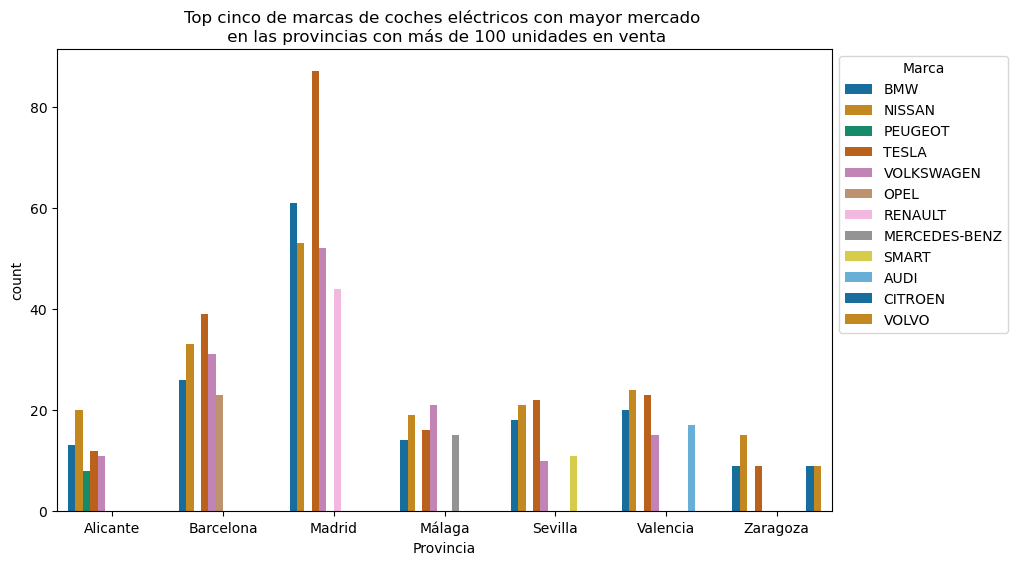

In [354]:
plt.figure(figsize = (10, 6))
cplot = sns.countplot(x = "Provincia", hue = "Marca", data = datos_filtrados, palette = "colorblind")
cplot.set(title="Top cinco de marcas de coches eléctricos con mayor mercado \n en las provincias con más de 100 unidades en venta")
sns.move_legend(cplot, "upper left", bbox_to_anchor=(1, 1))
plt.show()

In [ ]:
#Filtrado Precio medio por provincia y marca y posterior graficado.
df_filtrado = df.groupby(["Provincia","Marca"])["P_cont"].aggregate([np.median])
df_filtrado

In [ ]:
plt.figure(figsize = (40, 14))
ax = sns.countplot(x = "Provincia", hue = "Marca", data = df, palette = "tab10")
sns.move_legend(ax, "center right")
plt.show()